<a href="https://colab.research.google.com/github/s44ths/Data-mining/blob/main/Happy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Влияние различных факторов на счастье людей
X1 - X6 имеют значения от 1 до 5
D - счастлив (1) или несчастлив (0)
X1 - Доступность информации о городских службах
X2 - Оценка стоимости и доступности жилья
X3 - Оценка качества государственных школ
X4 - Доверие опрашиваемого к местной полиции
X5 - Оценка качества содержания улиц и тротуаров
X6 - Оценка доступности общественных мероприятий

In [ ]:
import pandas as pd
df = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding = "utf-16")
# names = ["D", "City", "HomePrice", "School", "Police", "CityQuality", "Events"]
df.style.format(decimal=',').bar()
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
#df.drop([0], inplace = True)
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D       143 non-null    int64
 1   X1      143 non-null    int64
 2   X2      143 non-null    int64
 3   X3      143 non-null    int64
 4   X4      143 non-null    int64
 5   X5      143 non-null    int64
 6   X6      143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [ ]:
y = df['D']
x = df.drop(['D'], axis = 1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      143 non-null    int64
 1   X2      143 non-null    int64
 2   X3      143 non-null    int64
 3   X4      143 non-null    int64
 4   X5      143 non-null    int64
 5   X6      143 non-null    int64
dtypes: int64(6)
memory usage: 6.8 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(max_depth=3, random_state=21)
dectree.fit(x_train,y_train)
dectree.score(x_test,y_test)

0.6944444444444444

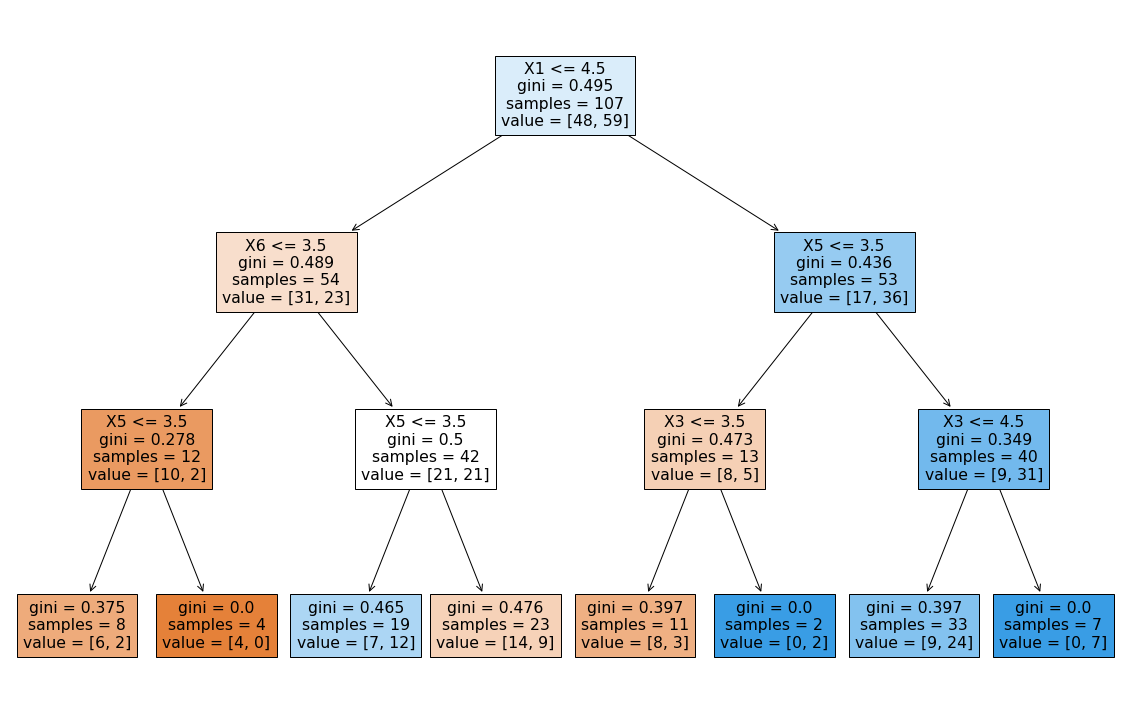

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=((20,13)))
plot_tree(dectree, 
          filled=True,
          feature_names=x.columns)
plt.show()

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 30,  max_depth=5,  random_state=21)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.6944444444444444

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,9,9
1,2,16


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7441860465116279

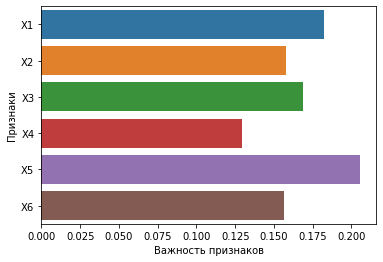

In [ ]:
import seaborn as sns
sns.barplot(x = rfc.feature_importances_, y = x_test.columns)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.show()

Градиентный бустинг

In [ ]:
import xgboost as xgb

cl = xgb.XGBClassifier(n_estimators = 30, max_depth = 5, random_state=21)
cl.fit(x_train,y_train)
cl.score(x_test, y_test)

0.6666666666666666

In [ ]:
y_pred = cl.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,10,8
1,4,14


In [ ]:
f1_score(y_test,y_pred)

0.7000000000000001

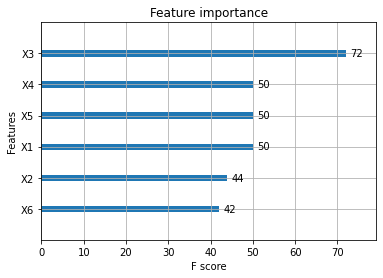

In [ ]:
xgb.plot_importance(cl)

In [ ]:
!pip install CatBoost

In [ ]:
from catboost import CatBoostClassifier

cl_cb = CatBoostClassifier(iterations = 500, depth = 4, l2_leaf_reg = 4.0, learning_rate = 0.07)
cl_cb.fit(x_train, y_train, logging_level = 'Silent', plot = True)
cb_pred = cl_cb.predict(x_test)
cl_cb.score(x_test, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.5833333333333334

In [ ]:
pd.DataFrame(confusion_matrix(y_test, cb_pred))

,0,1
0,8,10
1,5,13


In [ ]:
pd.DataFrame({'feature_importance': cl_cb.get_feature_importance(), 
              'feature_names': x.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
0,21.383606,X1
2,20.205730,X3
1,17.533096,X2
3,14.757299,X4
4,14.481941,X5
5,11.638327,X6


In [ ]:
f1_score(y_test,cb_pred)

0.6341463414634146

In [ ]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 150,  max_depth=5,  random_state=21)
gbt.fit(x_train, y_train)
gbt.score(x_test, y_test)

0.5833333333333334

In [ ]:
y_pred = gbt.predict_proba(x_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6358024691358024

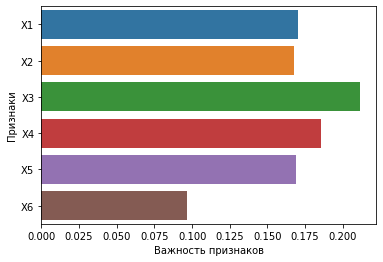

In [ ]:
import seaborn as sns
sns.barplot(x = gbt.feature_importances_, y = x_test.columns)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.show()